Simple tip calculator using fuzzy logic

In [14]:
from numpy import arange
from skfuzzy import gaussmf, trimf
from skfuzzy import control as ctrl
from matplotlib.pyplot import show

Utworzenie zmiennych wejściowych i wyjsciowych

In [15]:
service = ctrl.Antecedent(arange(0, 10.1, 0.01), 'service')
food = ctrl.Antecedent(arange(0, 10.1, 0.01), 'food')
mood = ctrl.Antecedent(arange(0, 10.1, 0.01), 'mood')
tip = ctrl.Consequent(arange(0, 30.1, 0.01), 'tip')

Zmienne lingwistyczne zmiennych wejściowych

In [16]:
service['bad'] = gaussmf(service.universe, 0, 1.5)
service['average'] = gaussmf(service.universe, 5, 1.5)
service['good'] = gaussmf(service.universe, 10, 1.5)

food['unsavory'] = trimf(food.universe, [0, 0, 4])
food['tasty'] = trimf(food.universe, [6, 10, 10])

mood['gloomy'] = gaussmf(mood.universe, 0, 0.75)
mood['poor'] = gaussmf(mood.universe, 2.5, 0.75)
mood['neutral'] = gaussmf(mood.universe, 5, 0.75)
mood['friendly'] = gaussmf(mood.universe, 7.5, 0.75)
mood['fantastic'] = gaussmf(mood.universe, 10, 0.75)

Zmienne lingwistyczne zmiennych wyjściowych

In [17]:
tip['funny'] = trimf(tip.universe, [0, 5, 10])
tip['low'] = trimf(tip.universe, [5, 10, 15])
tip['medium'] = trimf(tip.universe, [10, 15, 20])
tip['large'] = trimf(tip.universe, [15, 20, 25])
tip['huge'] = trimf(tip.universe, [20, 25, 30])

Metoda defuzyfikacji

In [18]:
tip.defuzzify_method = 'centroid'

Wyświetlenie zmiennych lingwistycznych zmiennych wejściowych i wyjściowych

/Volumes/Extreme SSD/Python/TipCalculator/my_env/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


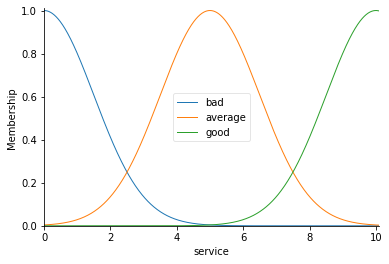

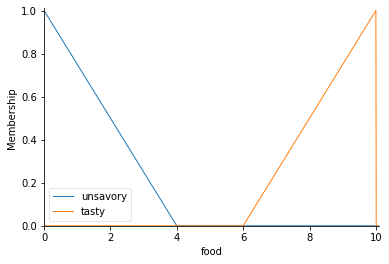

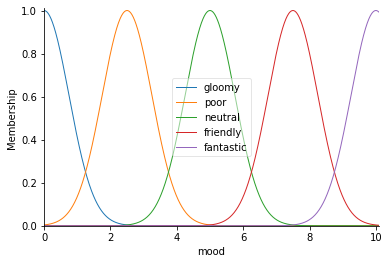

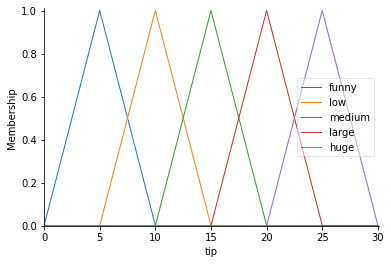

In [19]:
service.view()
show()

food.view()
show()

mood.view()
show()

tip.view()
show()

Baza reguł

In [20]:
rule1 = ctrl.Rule(service['bad'] & food['unsavory'], tip['funny'])
rule2 = ctrl.Rule(service['bad'] & mood['gloomy'], tip['funny'])
rule3 = ctrl.Rule(service['average'] & food['unsavory'] & mood['gloomy'], tip['low'])
rule4 = ctrl.Rule(service['average'] & food['unsavory'] & mood['poor'], tip['low'])
rule5 = ctrl.Rule(service['bad'] & food['tasty'] & mood['gloomy'], tip['low'])
rule6 = ctrl.Rule(service['bad'] & food['tasty'] & mood['poor'], tip['low'])
rule7 = ctrl.Rule(service['average'] & food['tasty'], tip['medium'])
rule8 = ctrl.Rule(service['good'] & ~food['tasty'] & mood['neutral'], tip['medium'])
rule9 = ctrl.Rule(service['average'] & ~food['unsavory'] & mood['friendly'], tip['medium'])
rule10 = ctrl.Rule(service['average'] & food['tasty'] & mood['friendly'], tip['large'])
rule11 = ctrl.Rule(service['average'] & food['tasty'] & mood['fantastic'], tip['large'])
rule12 = ctrl.Rule(service['good'] & ~food['unsavory'] & mood['friendly'], tip['large'])
rule13 = ctrl.Rule(service['good'] & mood['fantastic'], tip['large'])
rule14 = ctrl.Rule(service['good'] & food['tasty'] & mood['friendly'], tip['huge'])
rule15 = ctrl.Rule(service['good'] & food['tasty'] & mood['fantastic'], tip['huge'])

bonus_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, \
                                 rule7, rule8, rule9, rule10, rule11, rule12, \
                                     rule13, rule14, rule15])
bonus = ctrl.ControlSystemSimulation(bonus_ctrl)

Wartości zmiennych wejściowych układu

In [21]:
bonus.input['service'] = 8.0
bonus.input['food'] = 7.0
bonus.input['mood'] = 9.0

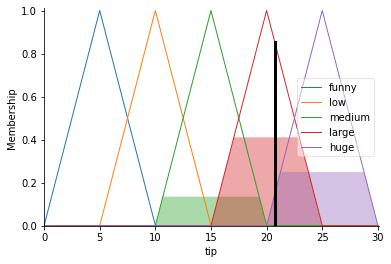

You should give 20% tip


In [26]:
bonus.compute()

tip.view(sim=bonus)
show()

tip_amount  = int(bonus.output['tip'])
print(f'You should give {tip_amount}% tip')